In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
df=pd.read_csv("dna.csv")
df.head()

A0  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  A171  A172  A173  A174  A175  \
0   0   1   0   0   0   0   1   0   0   0  ...     1     0     0     0     0   
1   0   0   1   0   0   1   0   0   0   0  ...     0     0     0     1     0   
2   0   0   1   0   0   1   0   1   0   0  ...     0     1     0     0     0   
3   0   0   0   0   0   0   0   1   0   0  ...     0     0     1     0     0   
4   0   1   0   0   0   0   0   1   0   0  ...     0     1     0     0     1   

   A176  A177  A178  A179  class  
0     1     1     0     0      3  
1     0     0     1     0      3  
2     1     0     0     1      3  
3     1     0     0     1      1  
4     0     1     0     0      2  

[5 rows x 181 columns]

In [3]:
df.columns

Index(['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       ...
       'A171', 'A172', 'A173', 'A174', 'A175', 'A176', 'A177', 'A178', 'A179',
       'class'],
      dtype='object', length=181)

In [4]:
df.shape

(3186, 181)

In [5]:
df.isnull().sum().sort_values(ascending=False)

A0       0
A114     0
A116     0
A117     0
A118     0
        ..
A62      0
A63      0
A64      0
A65      0
class    0
Length: 181, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Columns: 181 entries, A0 to class
dtypes: int64(181)
memory usage: 4.4 MB


In [7]:
y = df["class"]
X = df.drop(['class'], axis=1)

X.head()

nsp_classes = y.unique()
nsp_classes

from tensorflow.keras import utils as np_utils
from sklearn.preprocessing import LabelEncoder
# Encode class values as integers and perform one-hot-encoding
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y = np_utils.to_categorical(y)
print(y)

y.shape

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


(3186, 3)

Modelling(ANN with Keras)

In [8]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [9]:
# Train-Test 
from sklearn.model_selection import train_test_split
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [10]:
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(7, input_dim=180, activation='relu')) 
    model.add(Dropout(0.3)) # Added droupout to prevent overfitting
    model.add(Dense(41, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax')) # # 3 because it is output, the output should be layer 3
    # Because it is multi-class, activation function 'softmax' should be selected.
    # Because it is multi class, the loss function is "categorical_crossentropy"
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model
model = create_model() 

In [11]:
train=model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,validation_data=(X_test,y_test))

Epoch 1/100
70/70 [==============================] - 1s 6ms/step - loss: 1.0776 - accuracy: 0.4538 - val_loss: 1.0222 - val_accuracy: 0.5010
Epoch 2/100
70/70 [==============================] - 0s 3ms/step - loss: 1.0286 - accuracy: 0.5112 - val_loss: 0.9783 - val_accuracy: 0.5010
Epoch 3/100
70/70 [==============================] - 0s 3ms/step - loss: 0.9526 - accuracy: 0.5583 - val_loss: 0.8334 - val_accuracy: 0.6318
Epoch 4/100
70/70 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.6309 - val_loss: 0.7279 - val_accuracy: 0.6569
Epoch 5/100
70/70 [==============================] - 0s 3ms/step - loss: 0.7628 - accuracy: 0.6659 - val_loss: 0.6433 - val_accuracy: 0.6768
Epoch 6/100
70/70 [==============================] - 0s 5ms/step - loss: 0.7018 - accuracy: 0.6812 - val_loss: 0.5807 - val_accuracy: 0.6851
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6570 - accuracy: 0.6960 - val_loss: 0.5307 - val_accuracy: 0.6914
Epoch 8/100
7

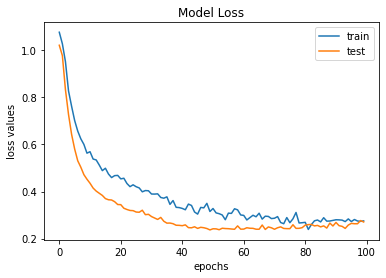

In [12]:
# plot loss during training
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

In [14]:
# Untunned Scores of the Model
import sklearn.metrics as metrics
y_pred=model.predict(X_test)

In [18]:
y_p = []
for i in range(len(y_pred)):
  y_p.append(np.argmax(y_pred[i]))
y_pred = np.array(y_p)

In [20]:
# %%Accuracy

print("Accuracy:",metrics.accuracy_score(np.argmax(y_test, axis=1),y_pred))

# %%f1 score

print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))

Accuracy: 0.9393305439330544
f1_weighted: 0.9392210200461985


In [21]:
# Grid Search Cross Validation
# GridSearch Cross Validation Parameters
param_grid = {
   
    'epochs': [100,150,200], 
    'batch_size':[50,100],
    'optimizer':['RMSprop', 'Adam','SGD'],
    
}

# create model

# Creating Model Object with KerasClassifier
model_cv = KerasClassifier(build_fn=create_model, verbose=1)


grid = GridSearchCV(estimator=model_cv,  
                    n_jobs=-1, 
                    verbose=1,
                    cv=5,
                    param_grid=param_grid)

grid_cv_model = grid.fit(X_train, y_train,) # Fitting the GridSearch Object on the Train Set


means = grid_cv_model.cv_results_['mean_test_score'] # Mean of test scores
stds = grid_cv_model.cv_results_['std_test_score'] # standard deviations of test scores
params = grid_cv_model.cv_results_['params'] # parameters used
# to print all scores, standard deviations and parameters used
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Printing the Best Parameters as a Result of Grid Search Cross Validation on the Screen
print("Best: %f using %s" % (grid_cv_model.best_score_, grid_cv_model.best_params_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Epoch 1/100
45/45 [==============================] - 1s 2ms/step - loss: 1.0404 - accuracy: 0.4996
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 1.0247 - accuracy: 0.5130
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 1.0027 - accuracy: 0.5193
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.9745 - accuracy: 0.5296
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.9215 - accuracy: 0.5462
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.8838 - accuracy: 0.5704
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.5897
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 0.8178 - accuracy: 0.6170
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 0.7899 - accuracy: 0.6619
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 0.7526 - accuracy: 0.6897
Epoch 11/

In [22]:
# %% Model Tuning- Building a Tuned Model with Best Parameters
# Creating Tuned Model Object with KerasClassifier
cv_model = grid_cv_model.best_estimator_

In [23]:
#%% K-FOLD
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# K-fold accuracy scores

In [24]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring= 'accuracy')

Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.2748 - accuracy: 0.2827
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.1873 - accuracy: 0.2919
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 1.1284 - accuracy: 0.3508
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0910 - accuracy: 0.3835
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0606 - accuracy: 0.4490
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0547 - accuracy: 0.4634
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0521 - accuracy: 0.4503
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0170 - accuracy: 0.5039
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0323 - accuracy: 0.4594
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9991 - accuracy: 0.5079
Epoch 11/

In [25]:
print('K-fold Cross Validation Accuracy Results: ', results)
print('K-fold Cross Validation Accuracy Results Mean: ', results.mean())

K-fold Cross Validation Accuracy Results:  [0.80208333 0.83769634 0.92670157 0.90052356 0.80628272]
K-fold Cross Validation Accuracy Results Mean:  0.8546575043630018


In [26]:
# K-fold f1 scores
from sklearn.model_selection import KFold


kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(cv_model, X_test, np.argmax(y_test, axis=1), cv=kfold,scoring="f1_weighted")

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 1.2002 - accuracy: 0.3115
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 1.1468 - accuracy: 0.3652
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 1.1116 - accuracy: 0.4005
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0785 - accuracy: 0.4424
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0718 - accuracy: 0.4686
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0422 - accuracy: 0.4961
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.0285 - accuracy: 0.4895
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0135 - accuracy: 0.5065
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0193 - accuracy: 0.4843
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9867 - accuracy: 0.4987
Epoch 11/

In [27]:
print('K-fold Cross Validation f1_weighted Results: ', results)
print('K-fold Cross Validation f1_weighted Results Mean: ', results.mean())

K-fold Cross Validation f1_weighted Results:  [0.8392796  0.92266071 0.86901107 0.93242108 0.91724994]
K-fold Cross Validation f1_weighted Results Mean:  0.8961244805995129


In [28]:
# Tuned Model Prediction

y_pred = cv_model.predict(X_test)

In [29]:
# %% f1 score
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(np.argmax(y_test, axis=1), y_pred,average='weighted'))

f1_weighted: 0.940486071200428


In [30]:
# %% Accuracy

print("accuracy:",metrics.accuracy_score(np.argmax(y_test, axis=1), y_pred))

accuracy: 0.9403765690376569


In [31]:
#%% Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report 

# Classification Report
model_report = classification_report(np.argmax(y_test, axis=1), y_pred)
print(model_report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       248
           1       0.91      0.91      0.91       229
           2       0.97      0.95      0.96       479

    accuracy                           0.94       956
   macro avg       0.93      0.94      0.93       956
weighted avg       0.94      0.94      0.94       956



In [32]:
# Confusion Matrix
model_conf = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(model_conf)

[[234   7   7]
 [ 13 208   8]
 [  9  13 457]]


In [33]:
#%% ROC-AUC Curve

y_score = cv_model.predict_proba(X_test)

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class

In [34]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

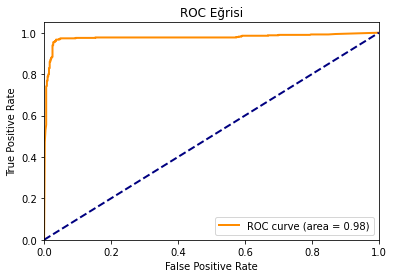

In [35]:
# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 2. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  # This is added back by InteractiveShellApp.init_path()


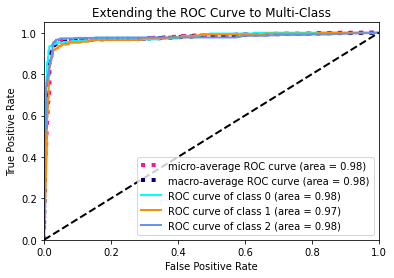

In [36]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()